<a href="https://colab.research.google.com/github/AdityaDeogaonkar/telco-churn/blob/main/telco_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv


In [ ]:
df = pd.read_csv("Telco-Customer-Churn.csv")

## data cleaning

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [ ]:
print(df.shape)
dfs = df[df.TotalCharges!=' ']
dfs.shape

(7043, 20)


(7032, 20)

In [ ]:
dfs.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
dfs.TotalCharges = pd.to_numeric(dfs.TotalCharges)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
dfs.TotalCharges.dtypes

dtype('float64')

In [ ]:
dfs[dfs.Churn =='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [ ]:
dfs.shape

(7032, 20)

In [ ]:
tenure_churn_no = dfs[dfs.Churn =='No'].tenure
tenure_churn_yes = dfs[dfs.Churn == 'Yes'].tenure

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

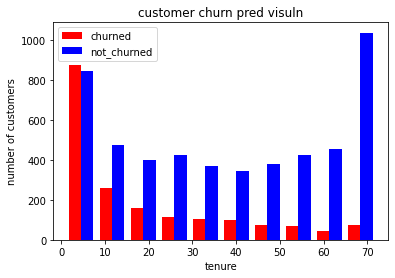

In [ ]:
plt.hist([tenure_churn_yes,tenure_churn_no],color = ["red","blue"],label=["churned","not_churned"])
plt.xlabel("tenure")
plt.ylabel("number of customers")
plt.title("customer churn pred visuln")
plt.legend()
plt.show

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

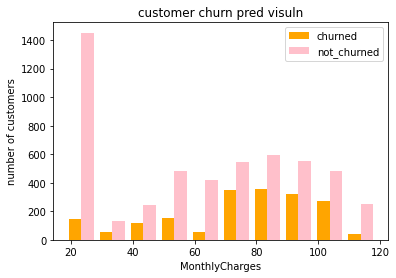

In [ ]:
MonthlyCharges_churn_no = dfs[dfs.Churn =='No'].MonthlyCharges
MonthlyCharges_churn_yes = dfs[dfs.Churn == "Yes"].MonthlyCharges
plt.hist([MonthlyCharges_churn_yes,MonthlyCharges_churn_no],color = ["orange","pink"],label=["churned","not_churned"])
plt.xlabel("MonthlyCharges")
plt.ylabel("number of customers")
plt.title("customer churn pred visuln")
plt.legend()
plt.show

In [ ]:
for column in df:
  print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [ ]:
def print_unq_col_val(df) :
  for column in df :
    if df[column].dtypes=='object':
             print ( f'{column} : {df[column].unique()}') 

  

## """ This is called f-strings and are quite straightforward : 
  when using an "f" in front of a string, all the variables inside 
  curly brackets are read and replaced by there value. For example :

   [[ age = 18
    message = f"You are {age} years old"
    print(message)]]  """

In [ ]:
print(print_unq_col_val(dfs))

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']
None


In [ ]:
dfs.replace("No internet service","No",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
dfs.iloc[7]

gender                        Female
SeniorCitizen                      0
Partner                           No
Dependents                        No
tenure                            10
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                   Yes
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                  No
PaymentMethod           Mailed check
MonthlyCharges                 29.75
TotalCharges                   301.9
Churn                             No
Name: 7, dtype: object

In [ ]:
dfs.replace("No phone service","No",inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
dfs.iloc[7]

gender                      Female
SeniorCitizen                    0
Partner                         No
Dependents                      No
tenure                          10
PhoneService                    No
MultipleLines                   No
InternetService                DSL
OnlineSecurity                 Yes
OnlineBackup                    No
DeviceProtection                No
TechSupport                     No
StreamingTV                     No
StreamingMovies                 No
Contract            Month-to-month
PaperlessBilling                No
PaymentMethod         Mailed check
MonthlyCharges               29.75
TotalCharges                 301.9
Churn                           No
Name: 7, dtype: object

In [ ]:
print(print_unq_col_val(dfs))

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']
None


In [ ]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
              'DeviceProtection','TechSupport','StreamingTV','PaperlessBilling','Churn','StreamingMovies']

for col in yes_no_col :
  dfs[col].replace({ 'Yes':1 ,'No':0},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
print(print_unq_col_val(dfs))

gender : ['Female' 'Male']
InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
None


In [ ]:
for col in dfs :
  print(f'{col}: {dfs[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
dfs['gender'].replace({'Female':1,'Male':0},inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
dfs['gender'].unique()

array([1, 0])

In [ ]:
dfss = pd.get_dummies(data=dfs,columns=['InternetService','Contract','PaymentMethod'])
dfss[dfss.columns]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,0,0,0,1,74.40,306.60,1,0,1,0,1,0,0,0,0,0,1


In [ ]:
dfss.sample(6)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1543,1,0,1,0,5,1,0,0,0,0,0,0,0,0,69.95,330.15,1,0,1,0,1,0,0,0,0,1,0
4450,0,0,0,0,15,1,1,0,1,0,1,0,0,1,58.60,939.70,1,1,0,0,1,0,0,0,1,0,0
1157,1,1,1,0,62,1,1,0,1,1,0,1,0,1,97.95,5936.55,0,0,1,0,0,1,0,0,1,0,0
3795,0,0,0,0,12,1,0,0,0,0,0,1,0,1,81.45,912.00,0,0,1,0,1,0,0,0,0,1,0
2323,1,0,0,0,29,1,1,0,0,1,0,1,1,1,98.60,2933.20,1,0,1,0,1,0,0,0,1,0,0
1287,1,0,1,1,30,1,1,0,1,1,1,1,1,1,107.50,3242.50,0,0,1,0,1,0,0,0,0,1,0


In [ ]:
dfs[dfs.columns]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
dfss.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

### scaling

In [ ]:
to_scale_col = ['tenure','MonthlyCharges','TotalCharges']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfss[to_scale_col]= scaler.fit_transform(dfss[to_scale_col])

In [ ]:
dfss.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4076,0,0,1,0,0.971831,1,1,1,1,1,0,1,0,1,0.806965,0.799181,0,0,1,0,0,0,1,0,1,0,0
4056,1,0,0,0,0.028169,0,0,0,1,0,0,1,1,1,0.321891,0.015757,1,1,0,0,1,0,0,0,0,1,0
229,1,0,1,1,0.647887,1,1,1,1,0,1,1,1,1,0.667164,0.471781,0,1,0,0,0,0,1,0,1,0,0
2330,0,0,1,1,0.380282,1,1,0,1,0,0,0,1,0,0.459204,0.205787,0,1,0,0,1,0,0,0,0,1,0
699,0,0,1,1,1.000000,1,1,1,0,1,1,0,0,1,0.480100,0.553058,0,1,0,0,0,0,1,0,1,0,0


In [ ]:
for a in dfss:
  print(f'{a}:{dfss[a].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [ ]:
X = dfss.drop('Churn',axis=1)
y = dfss['Churn']

### training the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 5)

In [ ]:
X_train.shape

(5625, 26)

In [ ]:
X_test.shape

(1407, 26)

In [ ]:
y_train.shape

(5625,)

In [ ]:
y_test.shape

(1407,)

In [ ]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,0,0,1,1,0.660199,0.097709,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,0,0,0,0,0.011940,0.000075,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,1,1,1,1,0.605473,0.639978,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.259204,0.008135,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,0,1,1,1,0.808458,0.685703,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,1,0,0,0,0.367164,0.083556,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,0,0,0,0,0.107960,0.077221,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,1,0,0,1,0.420398,0.360760,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,1,0,0,0,0.121891,0.011493,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,0,0,0,0,0.072637,0.216859,0,0,1,0,0,1,1,0,0,0


In [ ]:
len(X_train.columns)

26

In [ ]:
X_train[10:]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3137,1,0,1,1,0.563380,1,1,0,1,1,1,1,1,1,0.903980,0.511822,0,1,0,0,1,0,1,0,0,0
4220,0,0,1,1,0.760563,1,0,0,0,0,0,0,0,0,0.012438,0.116265,0,0,1,0,1,0,0,0,0,1
6517,1,0,1,1,0.070423,1,0,0,0,0,0,1,0,0,0.364179,0.038807,1,0,0,1,0,0,0,0,1,0
5281,1,0,1,1,1.000000,1,1,1,1,0,1,0,0,0,0.482587,0.547138,1,0,0,0,0,1,0,1,0,0
4801,1,0,1,1,1.000000,1,1,1,1,1,1,0,1,0,0.622886,0.669969,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,1,0,1,1,0.985915,1,1,1,1,1,1,1,1,0,0.712935,0.729737,1,0,0,0,0,1,1,0,0,0
1730,0,0,0,0,0.000000,1,1,0,0,0,0,1,0,1,0.413930,0.004737,1,0,0,1,0,0,0,0,1,0
4086,1,0,1,0,1.000000,1,1,1,1,1,1,1,0,0,0.606468,0.621175,1,0,0,0,0,1,0,1,0,0
2259,1,0,0,0,0.098592,1,0,0,0,0,0,0,0,0,0.025871,0.016484,0,0,1,0,0,1,0,0,0,1


In [ ]:
dfss.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
to_in = ['Partner','Dependents ',' PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
         'TechSupport ','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [ ]:
dfss.Partner = pd.to_numeric(dfss.Partner)
dfss.Dependents = pd.to_numeric(dfss.Dependents)
dfss.PhoneService = pd.to_numeric(dfss.PhoneService)
dfss.MultipleLines = pd.to_numeric(dfss.MultipleLines)
dfss.OnlineSecurity = pd.to_numeric(dfss.OnlineSecurity)
dfss.OnlineBackup = pd.to_numeric(dfss.OnlineBackup)
dfss.DeviceProtection = pd.to_numeric(dfss.DeviceProtection)
dfss.TechSupport = pd.to_numeric(dfss.TechSupport)
dfss.StreamingTV = pd.to_numeric(dfss.StreamingTV)
dfss.StreamingMovies = pd.to_numeric(dfss.StreamingMovies)
dfss.PaperlessBilling = pd.to_numeric(dfss.PaperlessBilling)
dfss.Churn = pd.to_numeric(dfss.Churn)

In [ ]:
dfss.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(22,input_shape=(26,),activation=('relu')),
                          keras.layers.Dense(10,activation=('relu')),
                          keras.layers.Dense(1,activation=('sigmoid'))

])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train,y_train , epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.5277 - accuracy: 0.7392
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.7915
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7991
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8025
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8021
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.8060
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4121 - accuracy: 0.8041
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4109 - accuracy: 0.8068
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4092 - accuracy: 0.8082
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4076 - accura

In [ ]:
dfss.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4696 - accuracy: 0.7754


[0.4696371555328369, 0.7754086852073669]

In [ ]:
ypr = model.predict(X_test)

In [ ]:
ypr[:5]

array([[0.28511393],
       [0.47038555],
       [0.00746217],
       [0.8552917 ],
       [0.44150674]], dtype=float32)

In [ ]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [ ]:
y_pred = []
for ele in ypr:
  if ele > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred [:5]

[0, 0, 0, 1, 0]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       999
           1       0.63      0.55      0.59       408

    accuracy                           0.78      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.77      0.78      0.77      1407



## above we printed a classification report

<function matplotlib.pyplot.show>

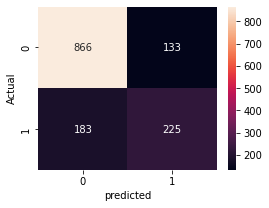

In [ ]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels = y_test , predictions = y_pred)

plt.figure(figsize = (4,3))
sns.heatmap(cm,annot = True , fmt = 'd')
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.show

## the above is a confusion matrix

In [ ]:
(866+225)/(866+133+183+225)  # true pred / total pred

0.775408670931059

In [ ]:
round(0.775408,2)

0.78

### precision for 0 , " not churned cust " 

In [ ]:
round(866/(866+183),2)

0.83

### precision for 1 " churned cust " 

In [ ]:
round(225/(225+133),2)

0.63

### recall for 0 (total truth)

In [ ]:
round(866/(866+133),2)

0.87

### recall for 1 

In [ ]:
round(225/(183+225),2)

0.55